# **Feature Importance Analysis using SHAP**

A.Veekshitha   
2303A52175    
Batch-41

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

          AA       0.27      0.57      0.36         7
          BA       0.33      0.20      0.25         5
          BB       0.00      0.00      0.00         4
          CB       0.00      0.00      0.00         2
          CC       0.00      0.00      0.00         3
          DC       0.00      0.00      0.00         3
          DD       1.00      0.33      0.50         3
        Fail       0.50      0.50      0.50         2

    accuracy                           0.24        29
   macro avg       0.26      0.20      0.20        29
weighted avg       0.26      0.24      0.22        29

Accuracy: 0.2413793103448276


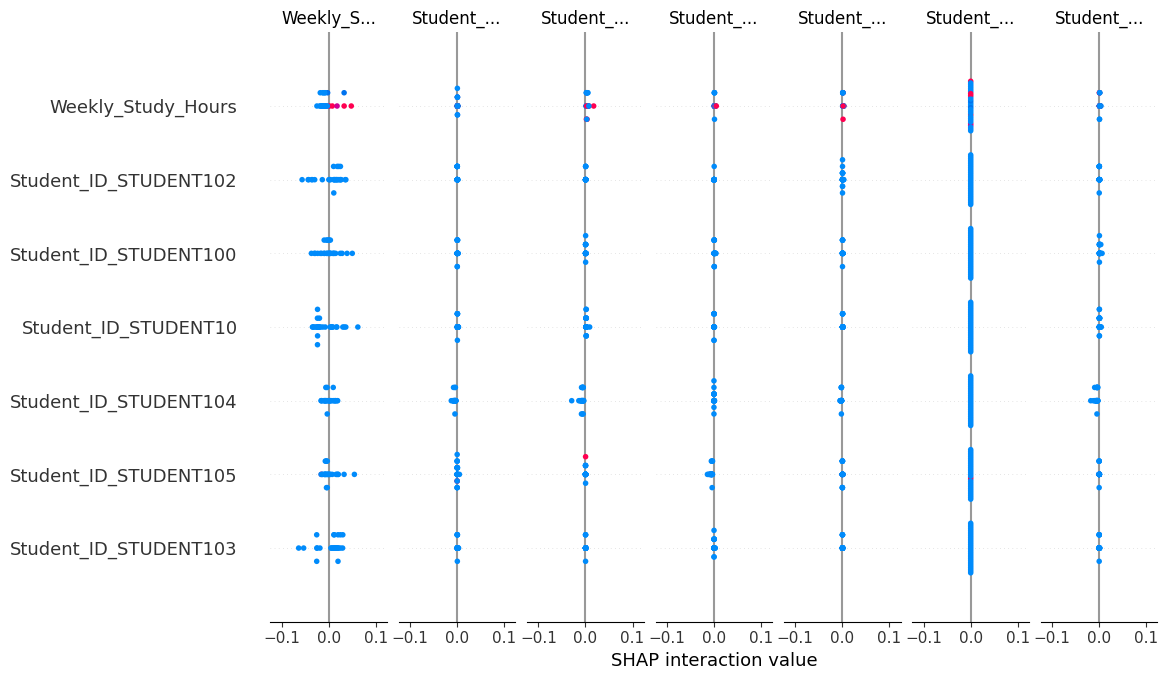

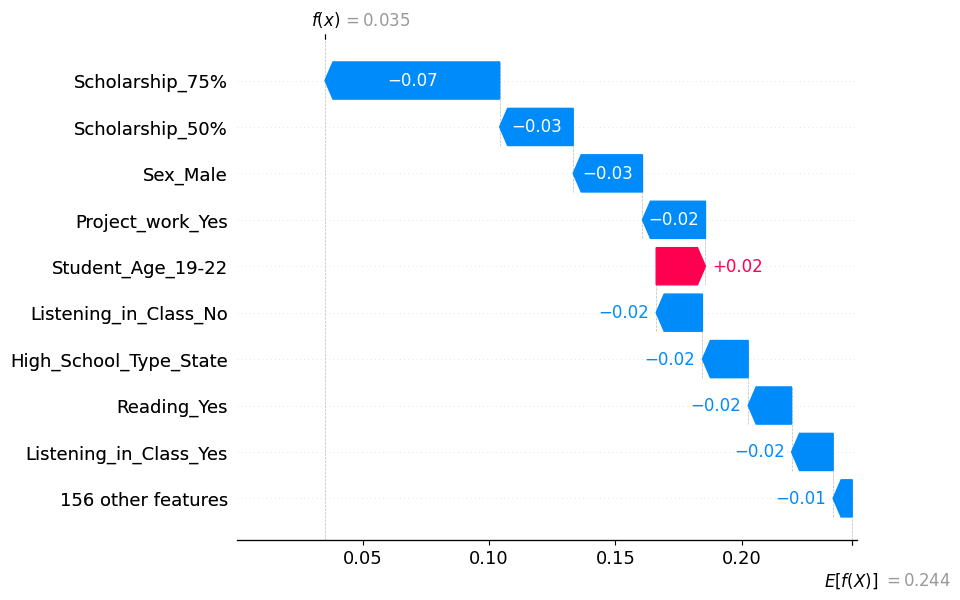

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('/content/Students Performance .csv')

X = data.drop('Grade', axis=1)
y = data['Grade']
#Encode
X_encoded = pd.get_dummies(X, drop_first=True)
label_enc = LabelEncoder()
y_encoded = label_enc.fit_transform(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation

print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_enc.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred))

# SHAP

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_scaled)

shap.summary_plot(shap_values, X_test_scaled, feature_names=X_encoded.columns)

shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][:, 0], X_test_scaled[0,:], feature_names=X_encoded.columns)

# Waterfall plot
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], shap_values[0][:, 0], feature_names=X_encoded.columns)